In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('netflix_watching_history_week1.csv')


# Display the first few rows of the dataframe
print(df.head())


# Get a concise summary of the dataframe, including data types and non-null values
print(df.info())


# Generate descriptive statistics of the dataframe
print(df.describe())


# Check for missing values
print(df.isnull().sum())

   User_ID Age_Group       Gender  Show_ID    Title     Genre  \
0        1     18-24  Undisclosed       13  Show_13   Fantasy   
1        1     18-24  Undisclosed       20  Show_20    Action   
2        1     18-24  Undisclosed       69  Show_69    Comedy   
3        1     18-24  Undisclosed       70  Show_70    Action   
4        1     18-24  Undisclosed       85  Show_85  Thriller   

   Viewing_Duration Completion_Status  Rating  Device  ...  Likes Shares  \
0                41         Completed     2.0      TV  ...    Yes     No   
1                55            Midway     1.0  Mobile  ...     No     No   
2                21         Completed     2.0  Mobile  ...    Yes     No   
3                52         Completed     4.0  Mobile  ...     No     No   
4                60         Completed     5.0  Tablet  ...    Yes    Yes   

                                            Comments Watch_Time_Of_Day  \
0  Yourself change fill red make none owner docto...           Evening   
1  T

User_ID                      0
Age_Group                    0
Gender                       0
Show_ID                      0
Title                        0
Genre                        0
Viewing_Duration             0
Completion_Status            0
Rating                       0
Device                       0
Number_of_Views              0
Skip_Scenes                  0
Watchlist                    0
Re-watched                9036
Viewing_Session_Length       0
Co-viewing                   0
Likes                        0
Shares                       0
Comments                  2259
Watch_Time_Of_Day            0
Region                       0
Month                        0
Day_of_Week                  0
Release_Year                 0
Director                     0
Cast                         0
Date                         0
Day_of_Year                  0
dtype: int64

Rewatch Counts:
       Title  Rewatch_Count
0     Show_1             25
1    Show_10             32
2   Show_100      

/var/folders/5y/pjrsw60n65124xb_fjnr_68m0000gn/T/ipykernel_75630/1099519652.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_duration = df.groupby('Genre')['Viewing_Duration'].mean().sort_values()


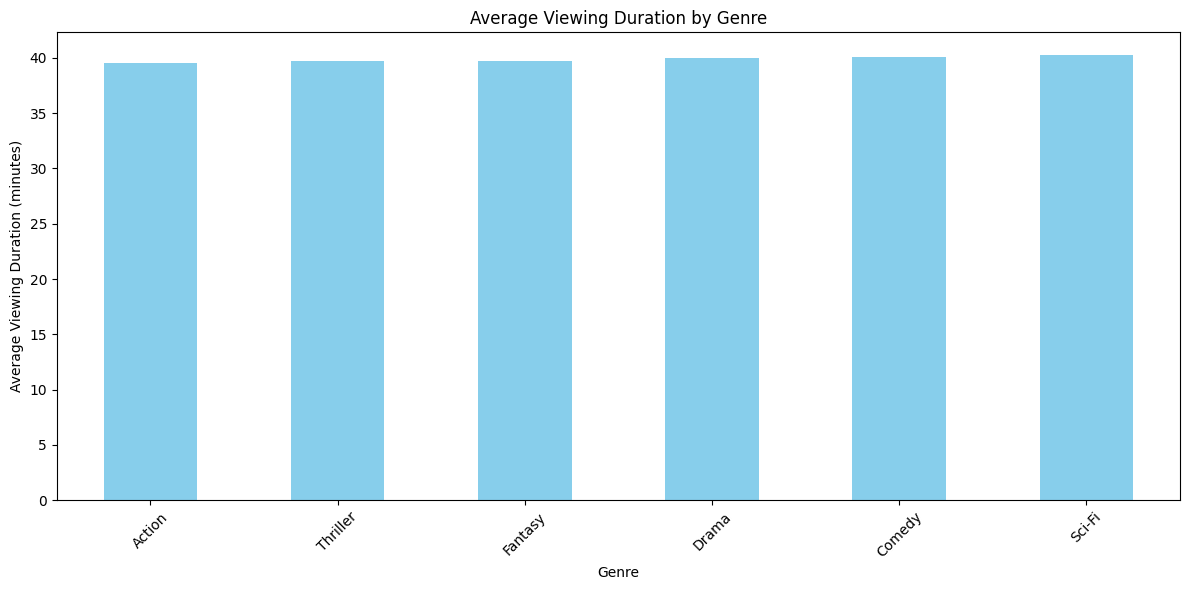

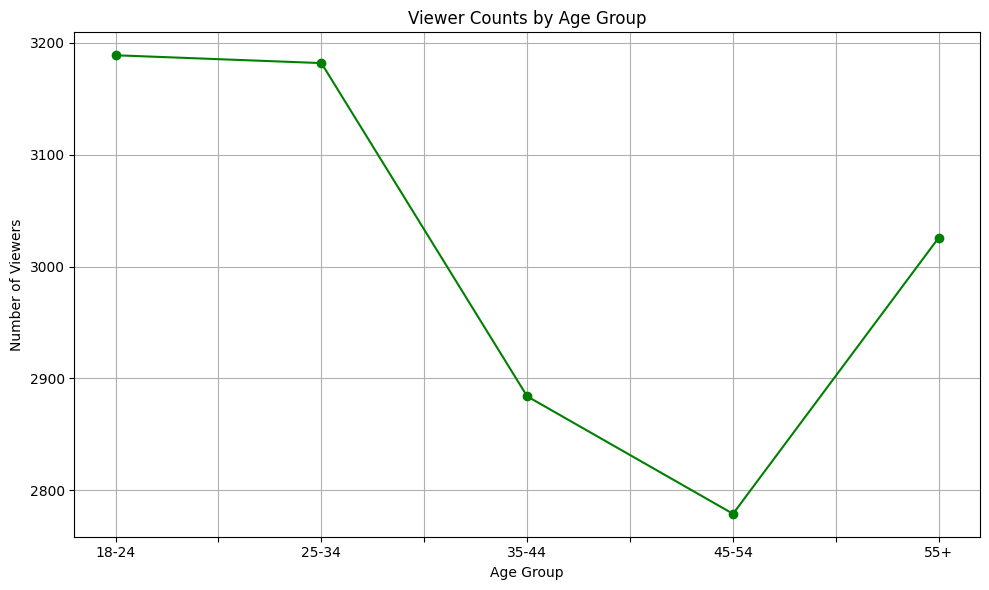

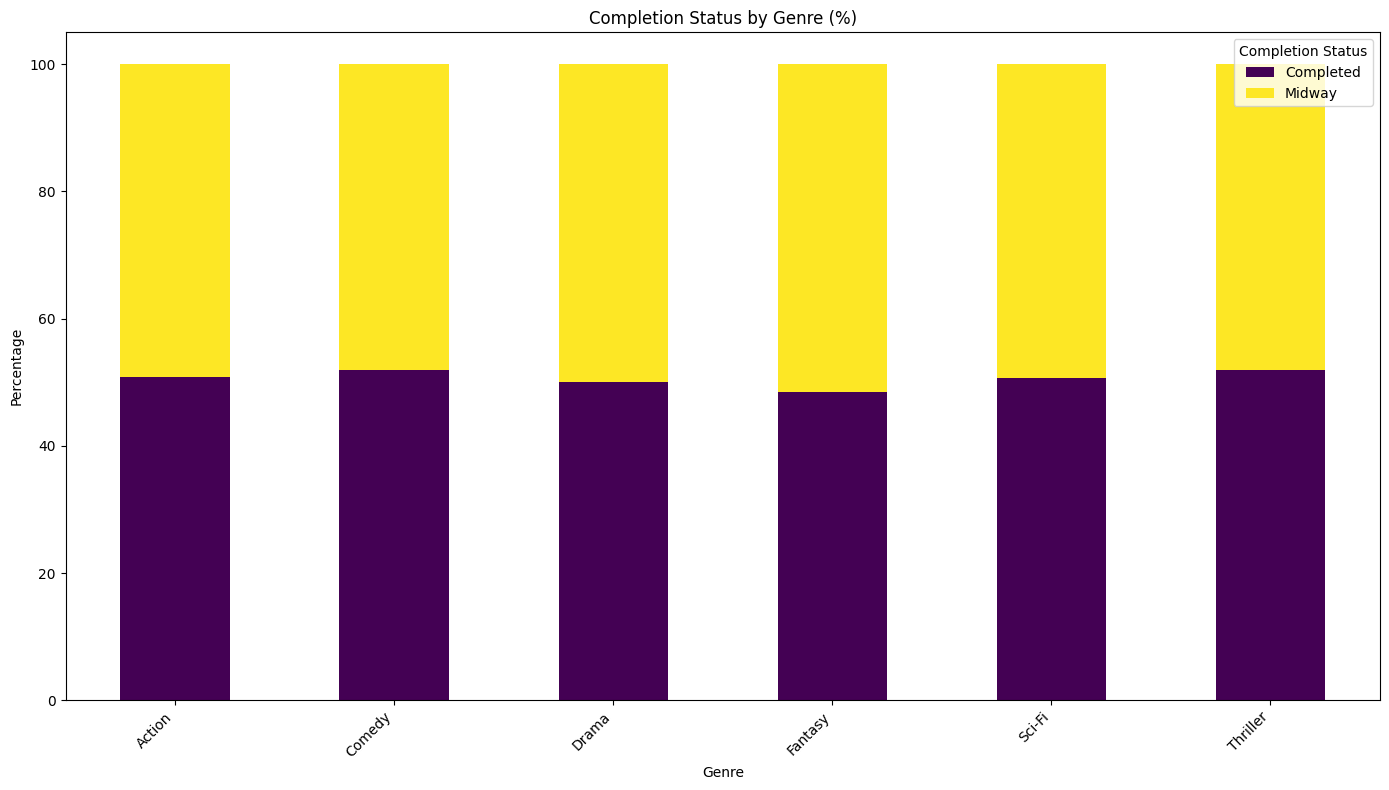

/var/folders/5y/pjrsw60n65124xb_fjnr_68m0000gn/T/ipykernel_75630/1099519652.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_rating = df.groupby('Device')['Rating'].median().sort_values(ascending=False)


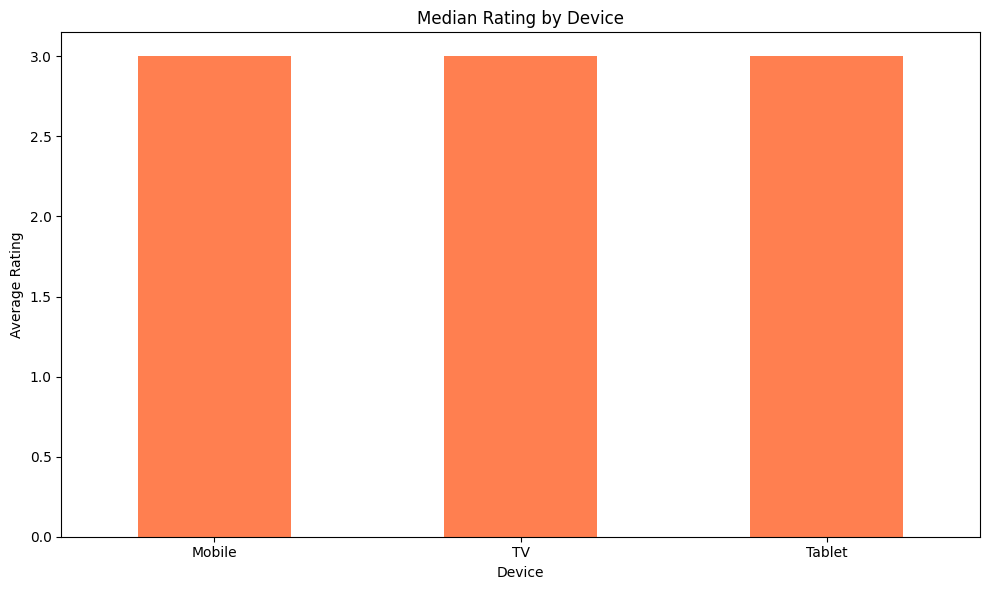

/var/folders/5y/pjrsw60n65124xb_fjnr_68m0000gn/T/ipykernel_75630/1099519652.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_views = df.groupby('Month').size()


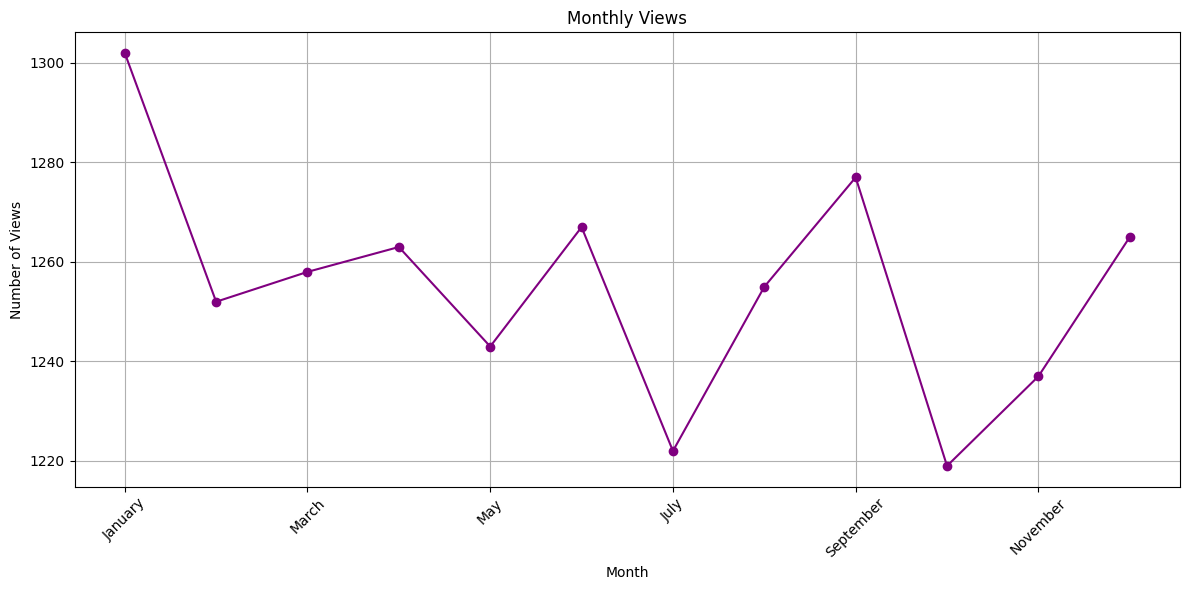

TypeError: category type does not support sum operations

In [ ]:
# Impute missing 'Rating' values with the median
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)


# Remove rows where 'Completion_Status' is missing
df = df.dropna(subset=['Completion_Status'])


# Verify that there are no more missing values
print(df.isnull().sum())


# Convert 'Age_Group' to an ordered categorical type
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=['18-24', '25-34', '35-44', '45-54', '55+'], ordered=True)


# Convert relevant columns to categorical type
for col in ['Gender', 'Genre', 'Completion_Status', 'Device', 'Skip_Scenes', 'Watchlist', 'Re-watched', 'Co-viewing', 'Likes', 'Shares']:
 df[col] = df[col].astype('category')


# Convert 'Month' and 'Day_of_Week' to categorical types
df['Month'] = pd.Categorical(df['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)


# Convert 'Release_Year' to numeric
df['Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce').dropna().astype(int)


# Create a new feature 'Day_of_Year'
df['Date'] = pd.to_datetime(df[['Month', 'Day_of_Week', 'Release_Year']].astype(str).agg('-'.join, axis=1), format='%B-%A-%Y')
df['Day_of_Year'] = df['Date'].dt.dayofyear


# Corrected: Calculate the rewatch counts for each title
rewatched_counts = df[(df['Re-watched'] == 'Yes') | (df['Re-watched'] == 'Probably_Yes')].groupby('Title').size().reset_index(name='Rewatch_Count')
print("\nRewatch Counts:")
print(rewatched_counts)


# Group data by 'Genre' and calculate the mean 'Viewing_Duration' for each genre
genre_duration = df.groupby('Genre')['Viewing_Duration'].mean().sort_values()


# Create a bar chart of average viewing duration by genre
plt.figure(figsize=(12, 6))
genre_duration.plot(kind='bar', color='skyblue')
plt.title('Average Viewing Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Viewing Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group data by 'Age_Group' and calculate the count of viewers in each age group
age_group_counts = df['Age_Group'].value_counts().sort_index()


# Create a line chart of viewer counts by age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='line', marker='o', color='green')
plt.title('Viewer Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Viewers')
plt.grid(True)
plt.tight_layout()
plt.show()


# Create a pivot table of 'Completion_Status' by 'Genre'
completion_genre = pd.pivot_table(df, index='Genre', columns='Completion_Status', aggfunc='size', fill_value=0)


# Calculate the percentages for each 'Completion_Status' within each genre
completion_genre_percentages = completion_genre.div(completion_genre.sum(axis=1), axis=0) * 100


# Plot the stacked bar chart
completion_genre_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Completion Status by Genre (%)')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Completion Status')
plt.tight_layout()
plt.show()


# Group the data by 'Device' and calculate the average 'Rating' for each device
device_rating = df.groupby('Device')['Rating'].median().sort_values(ascending=False)


# Create a bar chart of average rating by device
plt.figure(figsize=(10, 6))
device_rating.plot(kind='bar', color='coral')
plt.title('Median Rating by Device')
plt.xlabel('Device')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Group the data by 'Month' and count the number of views in each month
monthly_views = df.groupby('Month').size()


# Create a line chart of monthly views
plt.figure(figsize=(12, 6))
monthly_views.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Views')
plt.xlabel('Month')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Create a pivot table of 'Likes' by 'Age_Group' and 'Gender'
likes_pivot = pd.pivot_table(df, index='Age_Group', columns='Gender', values='Likes', aggfunc='sum')


# Create a heatmap of likes by age group and gender
plt.figure(figsize=(10, 6))
sns.heatmap(likes_pivot, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Likes by Age Group and Gender')
plt.tight_layout()
plt.show()